#### Завдання №1
**Завантажте набір даних про дитячі імена США з веб-сайту kaggle.com
(https://www.kaggle.com/kaggle/us-baby-names?select=NationalNames.csv)**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('NationalNames.csv')
print(len(df))

1825433


#### Завдання №2
**Виведіть перші 8 рядків набору даних.**

In [3]:
df.head(8)

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
5,6,Margaret,1880,F,1578
6,7,Ida,1880,F,1472
7,8,Alice,1880,F,1414


#### Завдання №3
**Вивести останні 8 рядків набору даних.**

In [4]:
df.tail(8)

,Id,Name,Year,Gender,Count
1825425,1825426,Zo,2014,M,5
1825426,1825427,Zyeir,2014,M,5
1825427,1825428,Zyel,2014,M,5
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5
1825432,1825433,Zyrin,2014,M,5


#### Завдання №4
***Отримайте імена стовпців набору даних**


In [5]:
df.columns

Index(['Id', 'Name', 'Year', 'Gender', 'Count'], dtype='object')

#### Завдання №5
***Отримайте загальну інформацію про дані у наборі даних.**

In [5]:
df.describe()

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


#### Завдання №6
**Знайдіть кількість унікальних імен у наборі даних**

In [2]:
df['Name'].nunique()

93889

#### Завдання №7
**Обчисліть кількість унікальних жіночих та чоловічих імен у цілому наборі
даних**

In [8]:
df.groupby('Gender')['Name'].nunique()

Gender
F    64911
M    39199
Name: Name, dtype: int64

#### Завдання №8
**Знайдіть 5 найпопулярніших чоловічих імен у 2010 році**

In [4]:
df[(df['Year'] == 2010) & (df['Gender'] == 'M')].sort_values('Count',ascending = False).head(5)

,Id,Name,Year,Gender,Count
1677392,1677393,Jacob,2010,M,22082
1677393,1677394,Ethan,2010,M,17985
1677394,1677395,Michael,2010,M,17308
1677395,1677396,Jayden,2010,M,17152
1677396,1677397,William,2010,M,17030


#### Завдання №9
**Знайдіть найпопулярніше ім’я за результатами одного року (ім’я, для якого
Count максимальне)**

In [195]:
PopularNameInYear = df[df.Count == df.Count.max()][["Name", "Year"]]
#PopularNameInYear
print("The name is '{}' in {}".format(str(PopularNameInYear['Name'].values[0]), int(PopularNameInYear['Year'])))

The name is 'Linda' in 1947


#### Завдання №10
**Підрахуйте кількість записів, для яких Count - мінімальне у наборі.**

In [37]:
df.where(df['Count'] == df['Count'].min()).count().iloc()[0]

254615

#### Завдання №11
**Підрахуйте кількість унікальних імен у кожному році**

In [24]:
df.groupby('Year')[['Name']].nunique()

,Name
Year,
1880,1889
1881,1830
1882,2012
1883,1962
1884,2158
...,...
2010,31603
2011,31418
2012,31236


#### Завдання №12
**Знайдіть рік із найбільшою кількістю унікальних імен.**

In [41]:
df.groupby('Year').nunique().sort_values('Name', ascending=False).head(1)

,Id,Name,Year,Gender,Count
Year,,,,,
2008,35045,32488,1,2,1377


#### Завдання №13
**Знайдіть найпопулярніше ім’я в році з найбільшою кількістю унікальних
імен (тобто у 2008 році)**

In [28]:
df[(df.Year == 2008)].sort_values('Count', ascending=False).head().iloc()[0]

Id        1608303
Name        Jacob
Year         2008
Gender          M
Count       22568
Name: 1608302, dtype: object

#### Завдання №14
**Знайдіть рік, коли ім’я “Jacob” було найпопулярнішим серед жіночих
імен**

In [46]:
df[(df.Name == 'Jacob') & (df.Gender == 'F')].sort_values('Count', ascending=False).head(1)

,Id,Name,Year,Gender,Count
1455556,1455557,Jacob,2004,F,171


#### Завдання №15
**Знайти рік із найбільшою кількістю гендерно нейтральних імен (однакові
чоловічі та жіночі імена)**

In [194]:
df3 = df.groupby(['Year', 'Name', 'Gender']).sum().unstack().dropna().groupby(['Year']).count().unstack()
max = df3.max()
print("{} рік має найбільшу кількість гендерно нейтральних імен = {} ".format(str(df3.index[df3 == max][0][2]),str(df3.values[df3 == max][0])))

2008 рік має найбільшу кількість гендерно нейтральних імен = 2557 


#### Завдання №16
**Знайдіть загальну кількість народжень за рік.**

In [49]:
df.groupby('Year').sum()['Count']

Year
1880     201484
1881     192699
1882     221538
1883     216950
1884     243467
         ...   
2010    3686589
2011    3646730
2012    3643336
2013    3626802
2014    3670151
Name: Count, Length: 135, dtype: int64

#### Завдання №17
**Знайдіть рік, коли народилося найбільше дітей**

In [18]:
df.groupby('Year').agg({'Count':sum}).sort_values(by=['Count'], 
                                                  ascending=False).head(1).index[0]

1957

#### Завдання №18
**Знайдіть кількість дівчаток та хлопчиків, які народились кожного року**

In [82]:
countBoyandGirls = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()
countBoyandGirls

Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445
...,...,...
2010,1772738,1913851
2011,1753500,1893230
2012,1753922,1889414


#### Завдання №19
**Підрахуйте кількість років, коли дівчаток народжувалось більше, ніж
хлопчиків.**

In [57]:
countBoyandGirls[countBoyandGirls.F > countBoyandGirls.M].count().F

54

#### Завдання №20
**Накресліть графік загальної кількості народжень хлопчиків та дівчаток на
рік.**

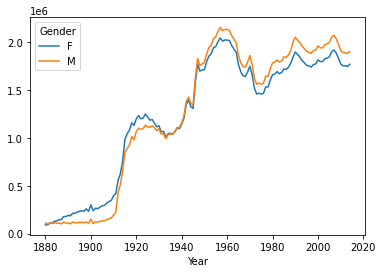

In [62]:
df = df.groupby(['Year', 'Gender'])['Count'].sum().unstack()
df.plot()
plt.show()

#### Завдання №21
**Підрахуйте кількість гендерно нейтральних імен (однакових для дівчат та
хлопців)**

In [17]:
df.groupby(['Name', 'Gender']).sum().unstack().dropna().count()['Count']

10221

#### Завдання №22
**Порахуйте, скільки разів хлопчиків називали Barbara**

In [23]:
df[(df.Name=='Barbara') & (df.Gender=='M')].Count.sum()

4139

#### Завдання №23
**Самостійно створіть 2 умови для аналізу даних цього набору даних та
реалізуйте їх.
1)Знайдіть жіноче і’мя, яким назвали менше всього дітей в 2001 році.**

In [112]:
df[(df.Year == 2001) & (df.Gender=='F')].groupby('Name').agg({'Count':sum}).sort_values(by=['Count'],ascending = False).tail(1).index[0]


'Lexandra'

#### Завдання №23 
**2)Накресліть графік загальної кількості народжень хлопчиків з ім’ям 'Michele' на рік.**

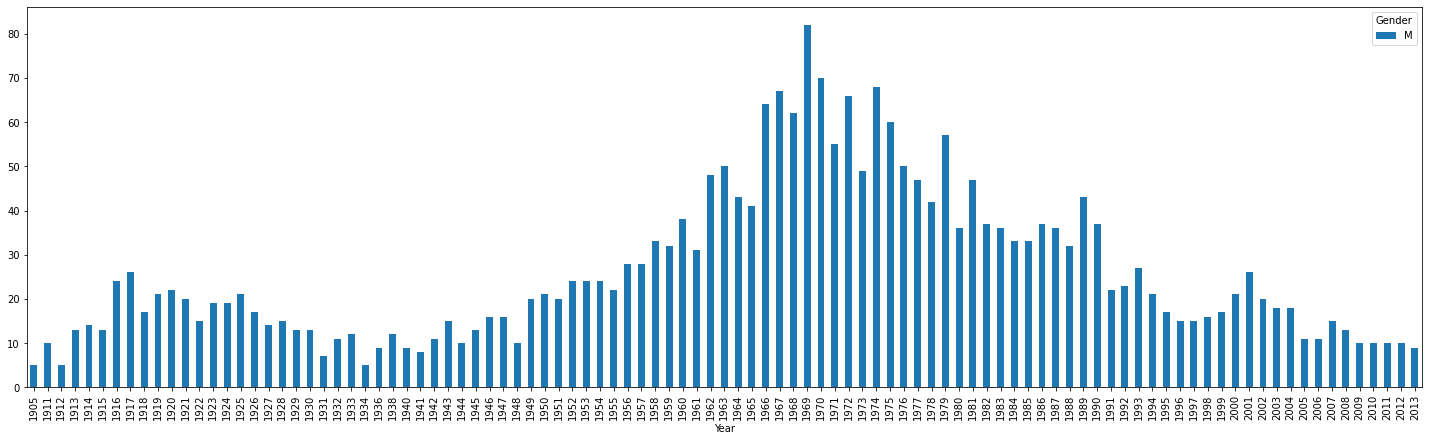

In [117]:
df[(df.Name=='Michele') & (df.Gender=='M')].groupby(['Year','Gender']).agg({'Count': sum}).unstack().Count.plot.bar(figsize=(25,7));